In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GalPot
import os

In [2]:
df = pd.read_csv('McMillan2017MilkyWayMCMCOutput.csv')

# Choose a model randomly from the chain (weighted by N\_chain)

In [5]:
rng = np.random.default_rng()
model = rng.choice(len(df),p=df['N_chain']/np.sum(df['N_chain']))

# Write to temporary file, and read from file

In [19]:
tmpname = 'tmpMW.pot'
nd,ns=4,2  # Number of discs, Number of spheroids

# Write to file so GalPot understands
with open('tmpMW.pot','w') as f:
    # Number of discs
    f.write(f'{nd}\n')
    # Parameters of the discs
    for i in range(nd):
        for j in range(5):
            f.write(str(df.iloc[model][f'DiskPar{i}{j}']))
            if(j!=4): f.write(' ')
        f.write('\n')
    # Number of spheroids
    f.write(f'{ns}\n')
    # Parameters of spheroids
    for i in range(ns):
        for j in range(6):
            f.write(str(df.iloc[model][f'SphrPar{i}{j}']))
            if(j!=5): f.write(' ')
        f.write('\n')
f.close()

Phi = GalPot.GalaxyPotential(tmpname)

# remove file - remove this code if you don't want to!
if os.path.exists(tmpname):
    os.remove(tmpname)
else:
    print("The file does not exist for some reason")

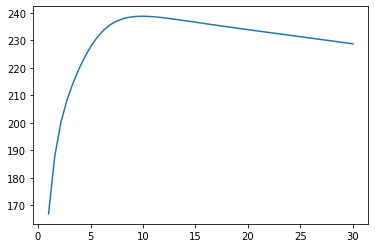

In [24]:
R = np.linspace(1,30)
vc = Phi.Vcirc(R)
plt.plot(R,vc*Phi.kpc_Myr_to_km_s)
plt.show()

# Additional option - write to AGAMA format (TBD)